In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)

css_styling()

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv.imread("../static/bk-3.jpg")

In [3]:
h, w, c = img.shape
size = 12

### Contours

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity.


For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.


In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

In [4]:
ret_4, thres_5 = cv.threshold(
    cv.cvtColor(img, cv.COLOR_BGR2GRAY),
    thresh=0,
    maxval=255,
    type=cv.THRESH_BINARY + cv.THRESH_OTSU,
)

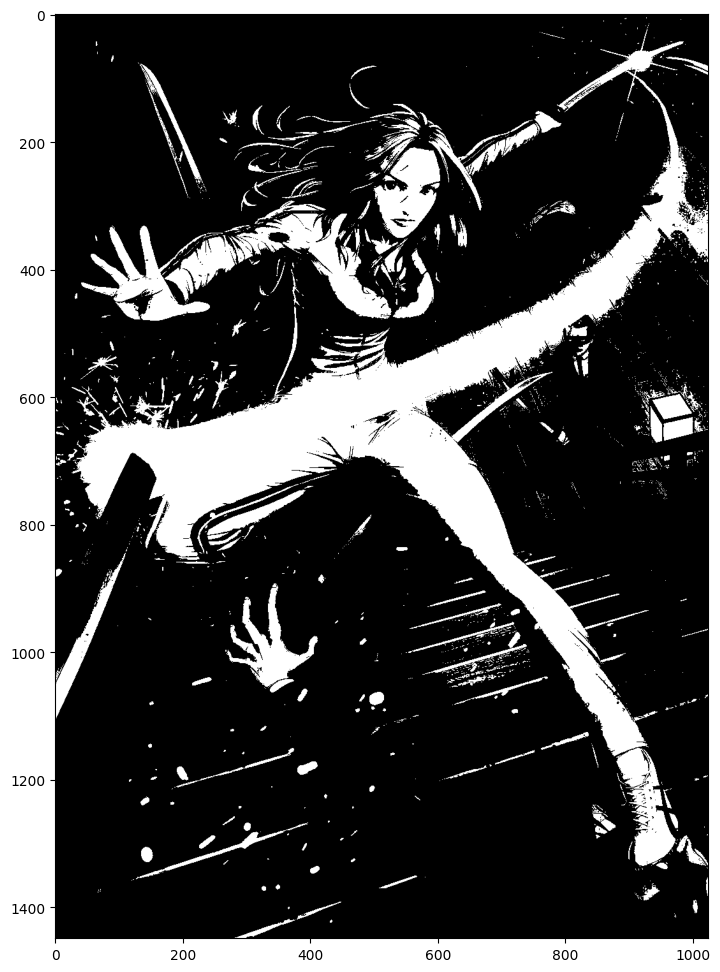

In [5]:
plt.figure(figsize=(9, 12))
plt.imshow(cv.cvtColor(thres_5, cv.COLOR_BGR2RGB))
plt.show()

In [6]:
contours, heirarchy = cv.findContours(thres_5, mode=cv.RETR_LIST, method=cv.CHAIN_APPROX_NONE)

In [7]:
cont_img = cv.drawContours(img, contours, contourIdx=-1, color=(0, 0, 255), thickness=2)

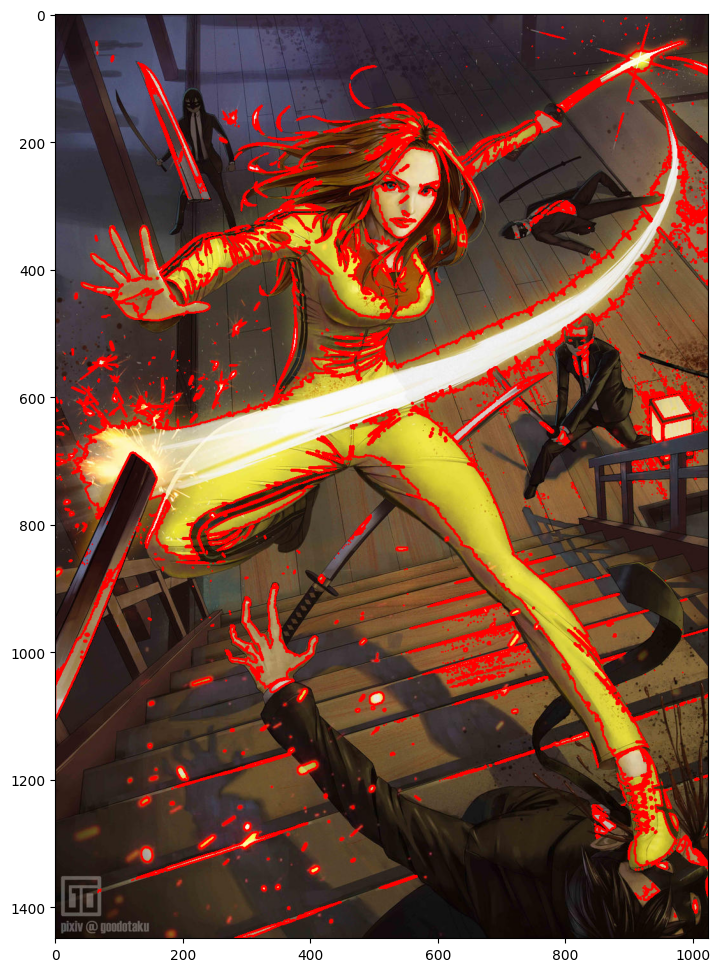

In [8]:
plt.figure(figsize=(9, 12))
plt.imshow(cv.cvtColor(cont_img, cv.COLOR_BGR2RGB))
plt.show()

#### [Contours heirarchy](https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html)

> Normally we use the `cv.findContours()` function to detect objects in an image, right ? Sometimes objects are in different locations. But in some cases, some shapes are inside other shapes. Just like nested figures. In this case, we call outer one as parent and inner one as child. This way, contours in an image has some relationship to each other.

So each contour has its own information regarding what hierarchy it is, who is its child, who is its parent etc. OpenCV represents it as an array of four values : `[Next, Previous, First_Child, Parent]`

In [9]:
contours, heirarchy = cv.findContours(thres_5, mode=cv.RETR_EXTERNAL, method=cv.CHAIN_APPROX_SIMPLE)
cont_img = cv.drawContours(img, contours, contourIdx=-1, color=(0, 0, 255), thickness=2)

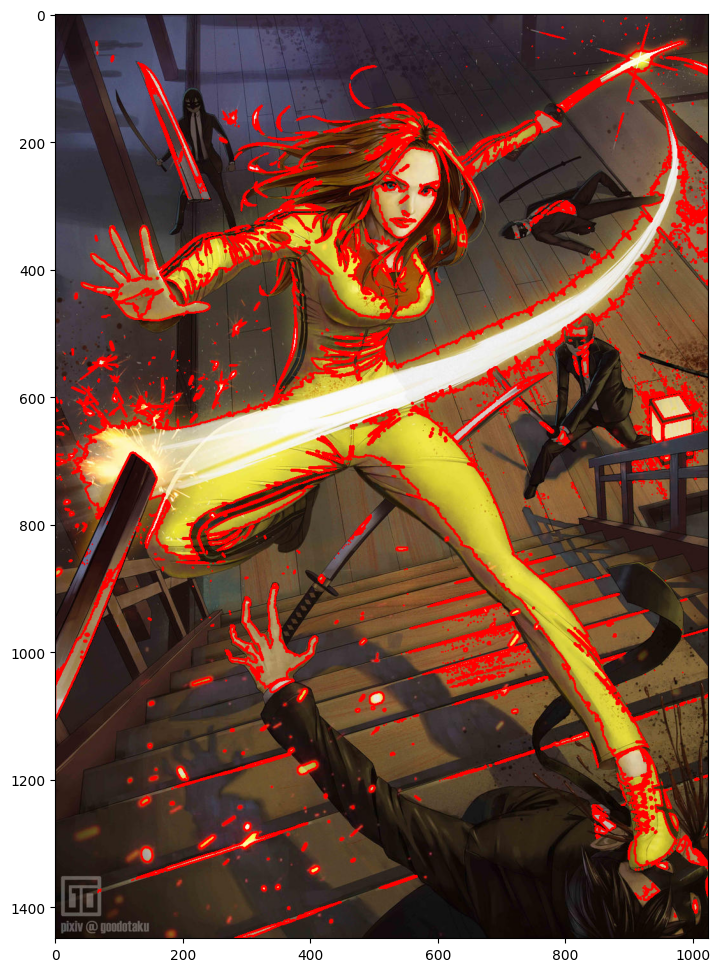

In [10]:
plt.figure(figsize=(9, 12))
plt.imshow(cv.cvtColor(cont_img, cv.COLOR_BGR2RGB))
plt.show()

#### Image moment

An image moment is a certain particular weighted average (moment) of the image pixels' intensities, or a function of such moments. Image moments help you to calculate some features like center of mass of the object, area of the object etc. The function `cv.moments()` gives a dictionary of all moment values calculated. From this moments, you can extract useful data like area, centroid etc.

In [27]:
imgx = cv.imread("./src/bunchoshapes3.jpeg")

In [28]:
h, w, c = imgx.shape

In [65]:
gray = cv.cvtColor(imgx, cv.COLOR_BGR2GRAY)
edged = cv.Canny(gray, threshold1=50, threshold2=100)
contours, hierarchy = cv.findContours(edged.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
img_with_cont = cv.drawContours(imgx, contours, -1, (0, 255, 0), 3)

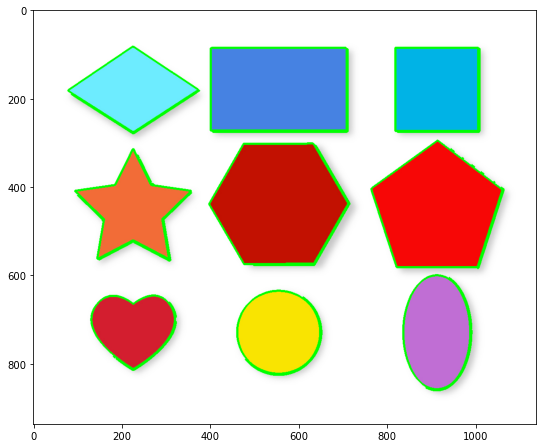

In [66]:
plt.figure(figsize=(9, 12))
plt.imshow(cv.cvtColor(img_with_cont, cv.COLOR_BGR2RGB))
plt.show()

#### Displaying the centroids

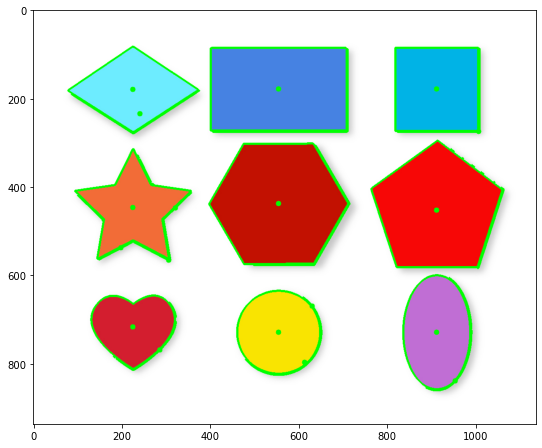

In [67]:
centr = img_with_cont.copy()

for cnt in contours:
    M = cv.moments(cnt)

    if M['m00']:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])

        cv.circle(centr, (cx, cy), 0, (0, 255, 0), thickness=12)
    
plt.figure(figsize=(9, 12))
plt.imshow(cv.cvtColor(centr, cv.COLOR_BGR2RGB))
plt.show()

In [50]:
contour_areas = [cv.contourArea(cnt) for cnt in contours]

#### Object detection with contours

In [19]:
img = cv.imread("../static/rz-1.jpg")
h, w, c = img.shape

In [20]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, th = cv.threshold(
    gray,
    thresh=0,
    maxval=255,
    type=cv.THRESH_BINARY + cv.THRESH_OTSU,
)
th_2 = cv.bitwise_not(th)
contours, hierarchy = cv.findContours(th_2, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
img_with_cont = cv.drawContours(img, contours, -1, (0, 255, 0), 3)

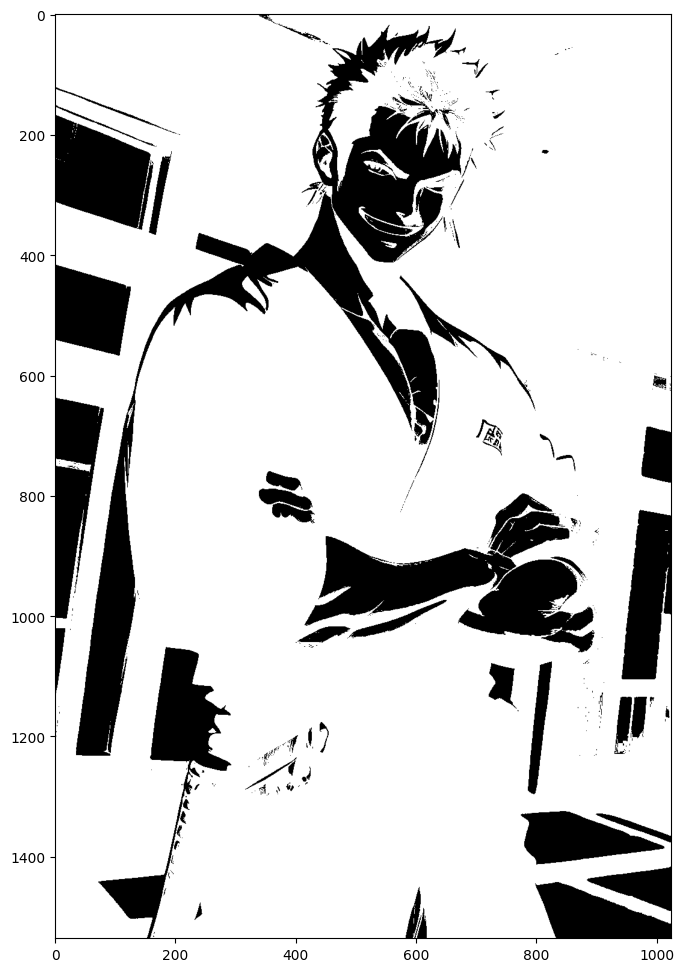

In [21]:
plt.figure(figsize=(9, 12))
plt.imshow(cv.cvtColor(th_2, cv.COLOR_BGR2RGB))
plt.show()

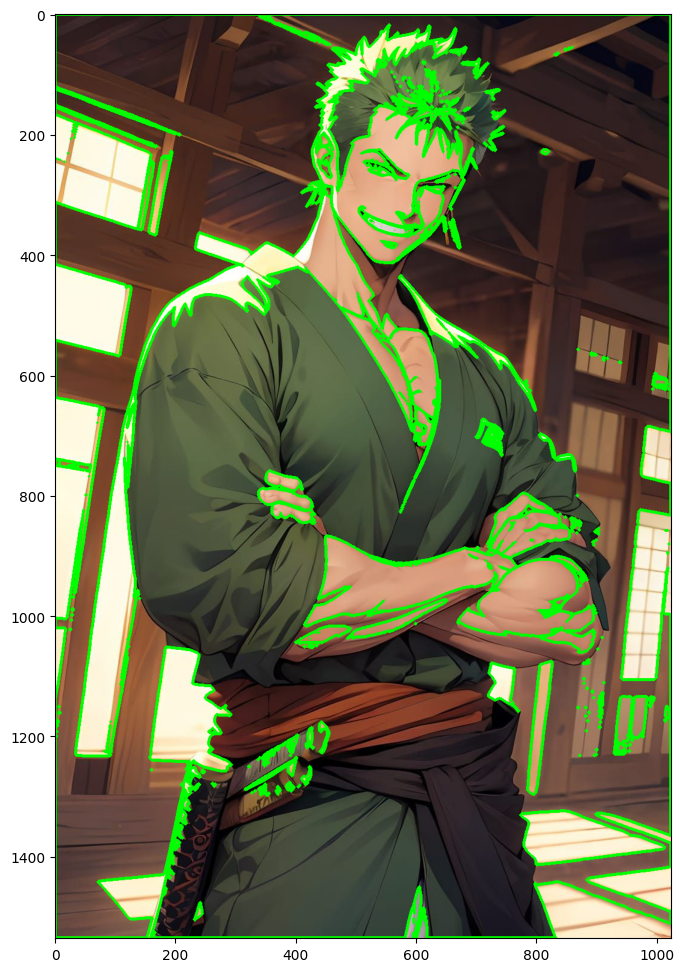

In [22]:
plt.figure(figsize=(9, 12))
plt.imshow(cv.cvtColor(img_with_cont, cv.COLOR_BGR2RGB))
plt.show()

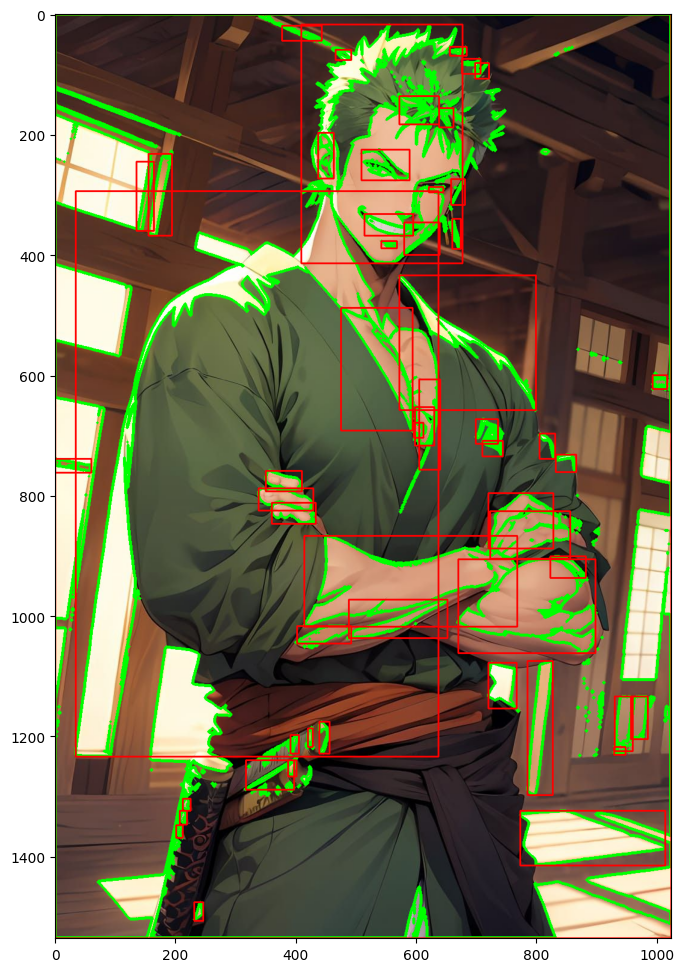

In [23]:
copy_1 = img.copy()
copy_2 = img.copy()

for cnt in contours:
    if cv.contourArea(cnt) > 100:
        try:
            x, y, w, h = cv.boundingRect(cnt)
            cv.rectangle(copy_1, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv.drawContours(copy_2, [cnt], 0, (0, 255, 0), 1)
        except:
            pass

plt.figure(figsize=(9, 12))
plt.imshow(cv.cvtColor(copy_1, cv.COLOR_BGR2RGB))
plt.show()

In [24]:
copy_3 = img.copy()

for cnt in contours:
    acc = 0.01 * cv.arcLength(cnt, True)
    approx = cv.approxPolyDP(cnt, acc, True)
    cv.drawContours(copy_3, [approx], 0, (0, 0, 255), 2)

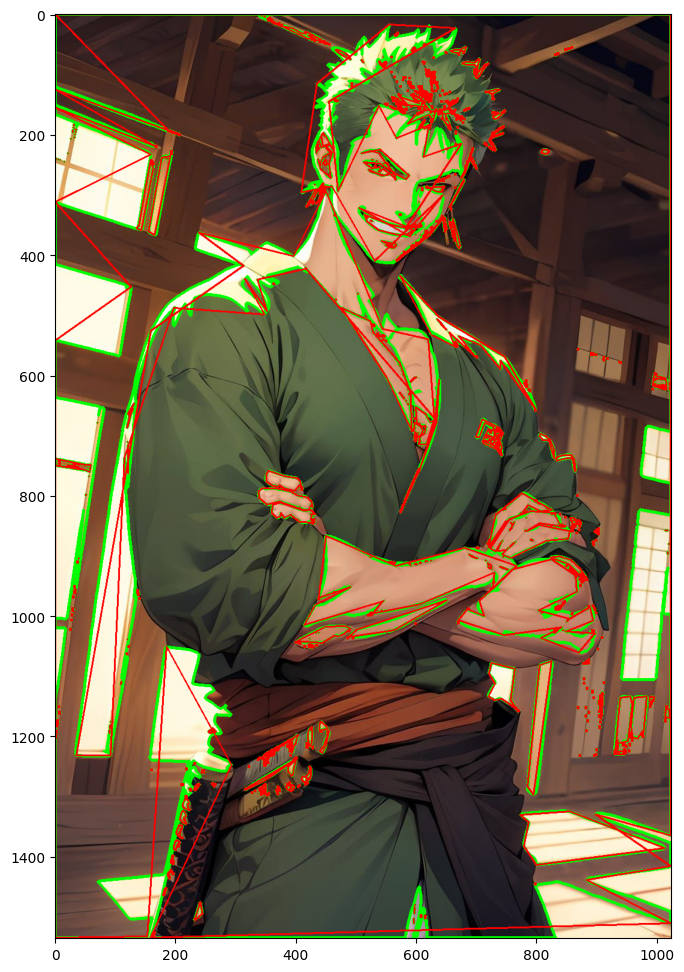

In [25]:
plt.figure(figsize=(9, 12))
plt.imshow(cv.cvtColor(copy_3, cv.COLOR_BGR2RGB))
plt.show()

#### Contour matching

In [46]:
heart = cv.imread("./src/heart.jpg")
h_heart, w_heart, c_heart = heart.shape

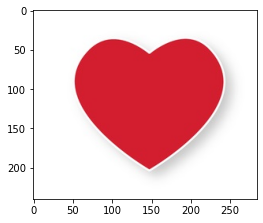

In [47]:
plt.figure(figsize=(4, 4))
plt.imshow(cv.cvtColor(heart, cv.COLOR_BGR2RGB))
plt.show()

In [48]:
_, thres = cv.threshold(cv.cvtColor(imgx, cv.COLOR_BGR2GRAY), 127, 255, 0)
_, thres_heart = cv.threshold(cv.cvtColor(heart, cv.COLOR_BGR2GRAY), 127, 255, 0)

contours, _ = cv.findContours(thres, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
contours_heart, _ = cv.findContours(thres_heart, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

_, template_contour, *rest = sorted(contours_heart, key=cv.contourArea, reverse=True)

In [59]:
for cnt in contours:
    match = cv.matchShapes(template_contour, cnt, 3, 0.0)
    closest_contour = cnt if match < 0.299 else []


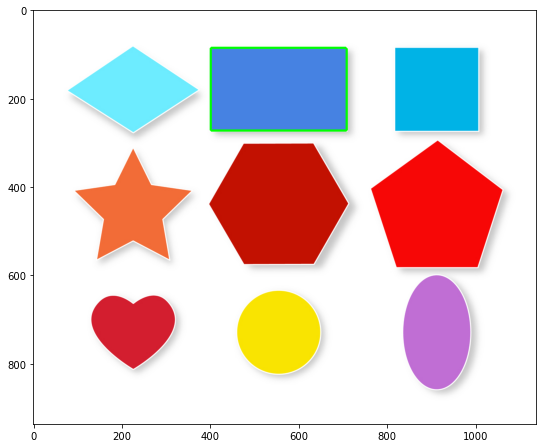

In [62]:
plt.figure(figsize=(9, 12))
plt.imshow(cv.cvtColor(img_cp, cv.COLOR_BGR2RGB))
plt.show()

### Line detection

#### Hough transforms

In [26]:
imgj = cv.imread("../static/bk-4.jpg")
h, w, c = imgj.shape
size = 12

In [27]:
edged = cv.Canny(
    cv.cvtColor(imgj, cv.COLOR_BGR2GRAY),
    threshold1=100,
    threshold2=170,
    apertureSize=3,
)

In [28]:
lines = cv.HoughLines(edged, rho=1, theta=np.pi/180, threshold=240)

In [29]:
len(lines)

7

In [30]:
imgjc = imgj.copy()

In [31]:
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0, y0 = a * rho, b * rho
    x1, y1 = int(x0 + 1000 * (-b)), int(x0 + 1000 * (a))
    x2, y2 = int(x0 - 1000 * (-b)), int(x0 - 1000 * (a))
    cv.line(imgjc, (x1, y1), (x2, y2), (255, 0, 0), 2)

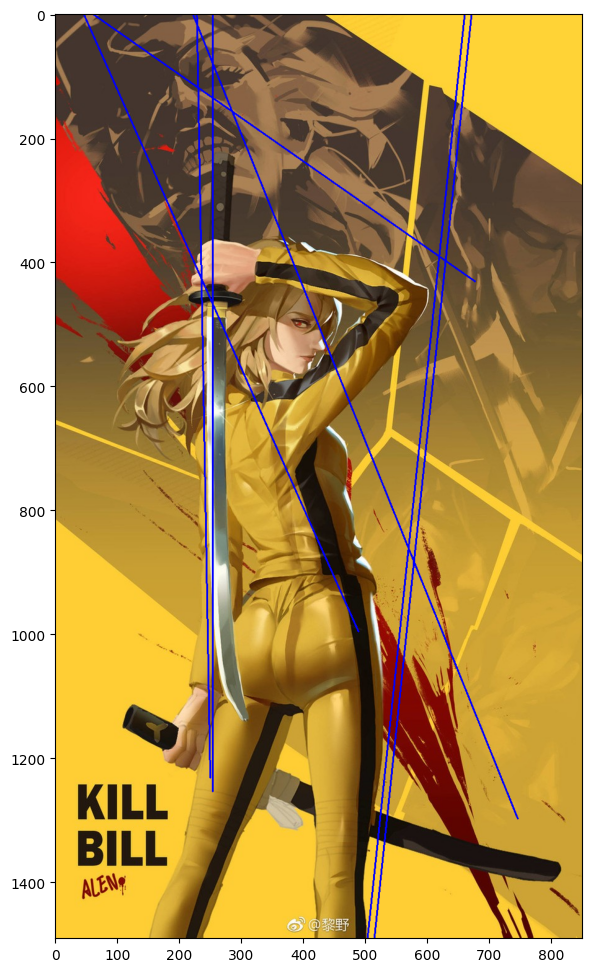

In [32]:
plt.figure(figsize=(9, 12))
plt.imshow(cv.cvtColor(imgjc, cv.COLOR_BGR2RGB))
plt.show()

#### Blob detection

In [33]:
detector = cv.SimpleBlobDetector_create()
keypoints = detector.detect(imgj)
blank = np.zeros((1, 1))
blobs = cv.drawKeypoints(imgj.copy(), keypoints, blank, (0, 255, 0), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

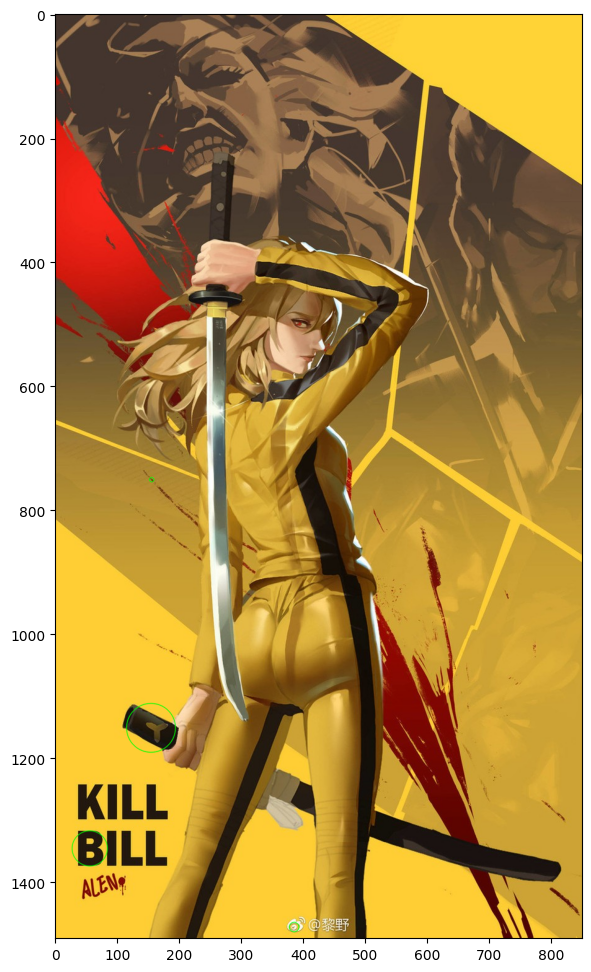

In [34]:
plt.figure(figsize=(9, 12))
plt.imshow(cv.cvtColor(blobs, cv.COLOR_BGR2RGB))
plt.show()

### Cornor Detection

A corner is a point whose local neighborhood stands in two dominant and different edge directions. A junction of two edges.

In [35]:
harris_corners = cv.cornerHarris(
    np.float32(cv.cvtColor(imgx, cv.COLOR_BAYER_BG2GRAY)),
    3,
    3,
    0.05,
)

NameError: name 'imgx' is not defined